In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Loading Data

In [11]:
# Read the datasets
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

In [12]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [13]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [14]:
client_data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [15]:
price_data.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

## 1. Data Types Analysis

In [ ]:
print("=== Client Data Types ===")
print(client_data.dtypes)

=== Client Data Types ===
id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_u

In [18]:
print("\n=== Price Data Types ===")
print(price_data.dtypes)


=== Price Data Types ===
id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object


In [19]:
# Convert date columns to datetime
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_columns:
    client_data[col] = pd.to_datetime(client_data[col])
price_data['price_date'] = pd.to_datetime(price_data['price_date'])

## 2. Descriptive Statistics

In [ ]:
print("\n=== Client Data Summary Statistics ===")
print(client_data.describe())


=== Client Data Summary Statistics ===
           cons_12m  cons_gas_12m  cons_last_month  \
count  1.460600e+04  1.460600e+04     14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752   
min    0.000000e+00  0.000000e+00         0.000000   
25%    5.674750e+03  0.000000e+00         0.000000   
50%    1.411550e+04  0.000000e+00       792.500000   
75%    4.076375e+04  0.000000e+00      3383.000000   
max    6.207104e+06  4.154590e+06    771203.000000   
std    5.734653e+05  1.629731e+05     64364.196422   

                          date_activ                       date_end  \
count                          14606                          14606   
mean   2011-01-28 07:54:18.879912448  2016-07-27 20:48:26.422018560   
min              2003-05-09 00:00:00            2016-01-28 00:00:00   
25%              2010-01-15 00:00:00            2016-04-27 06:00:00   
50%              2011-03-04 00:00:00            2016-08-01 00:00:00   
75%              2012-04-19 00:00:00           

In [22]:
print("\n=== Price Data Summary Statistics ===")
print(price_data.describe())


=== Price Data Summary Statistics ===
                          price_date  price_off_peak_var  price_peak_var  \
count                         193002       193002.000000   193002.000000   
mean   2015-06-16 12:50:49.933161216            0.141027        0.054630   
min              2015-01-01 00:00:00            0.000000        0.000000   
25%              2015-04-01 00:00:00            0.125976        0.000000   
50%              2015-07-01 00:00:00            0.146033        0.085483   
75%              2015-10-01 00:00:00            0.151635        0.101673   
max              2015-12-01 00:00:00            0.280700        0.229788   
std                              NaN            0.025032        0.049924   

       price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
count       193002.000000       193002.000000   193002.000000   
mean             0.030496           43.334477       10.622875   
min              0.000000            0.000000        0.000000   
25%             

In [24]:
# Check for missing values
print("\n=== Missing Values in Client Data ===")
print(client_data.isnull().sum())


=== Missing Values in Client Data ===
id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64


In [25]:
print("\n=== Missing Values in Price Data ===")
print(price_data.isnull().sum())


=== Missing Values in Price Data ===
id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64


## 3. Distribution Analysis

In [26]:
# Function to create distribution plots
def plot_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    if data[column].dtype in ['int64', 'float64']:
        sns.histplot(data[column], kde=True)
    else:
        sns.countplot(data=data, x=column)
    plt.title(f'Distribution of {title}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

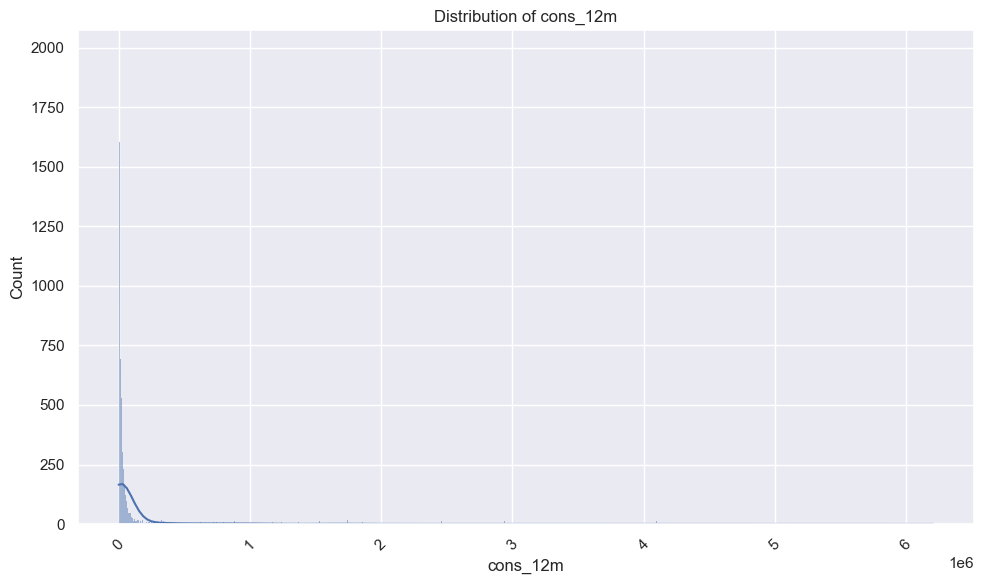

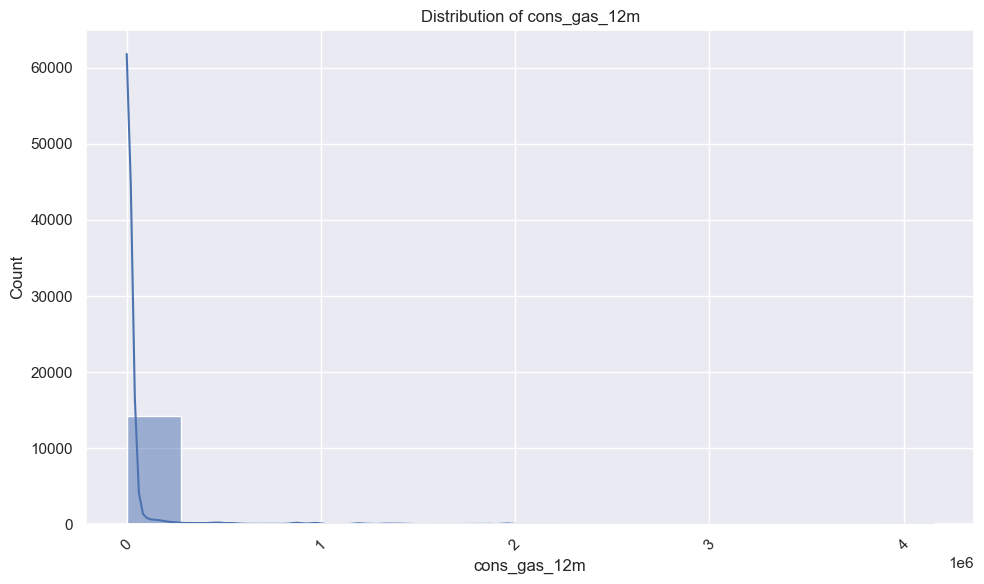

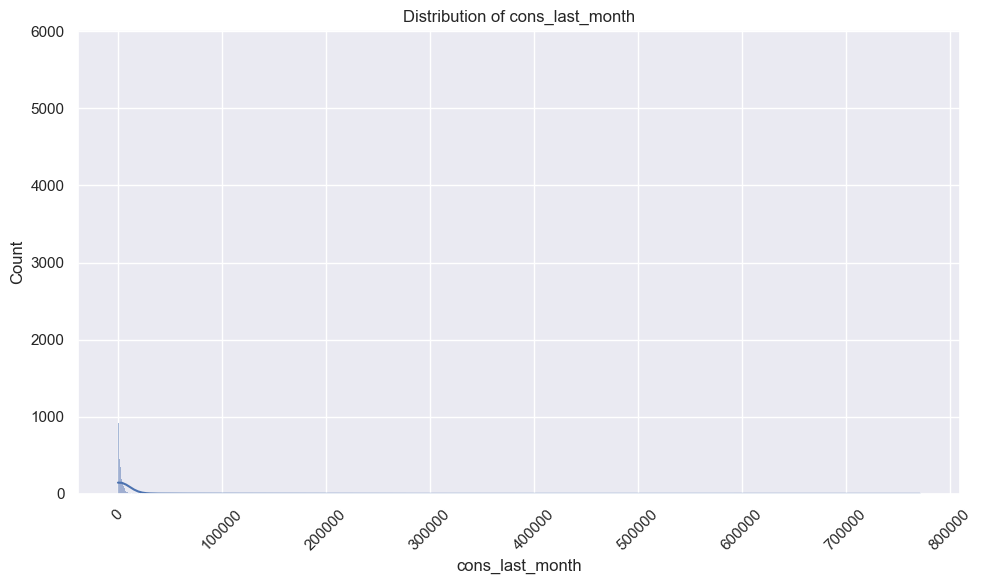

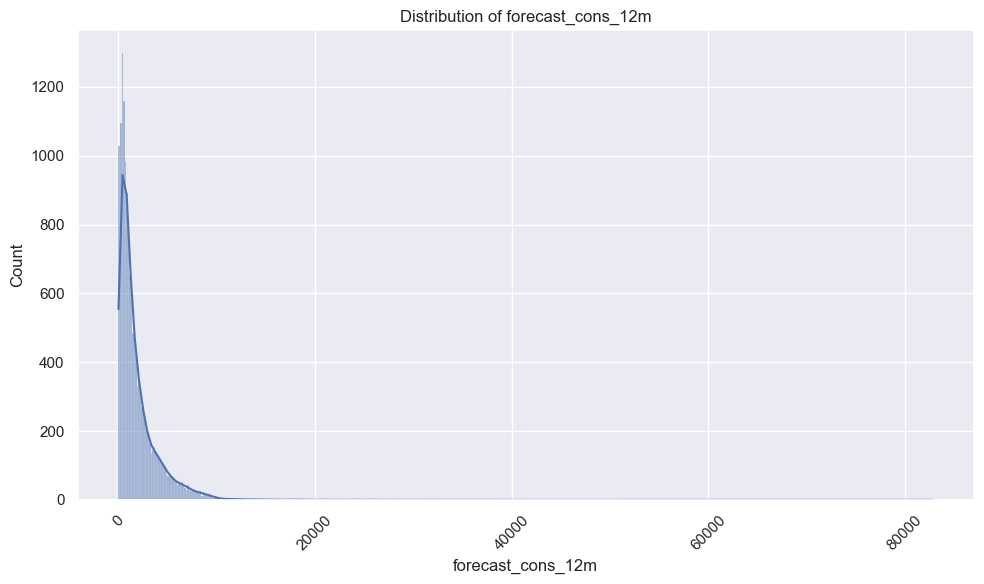

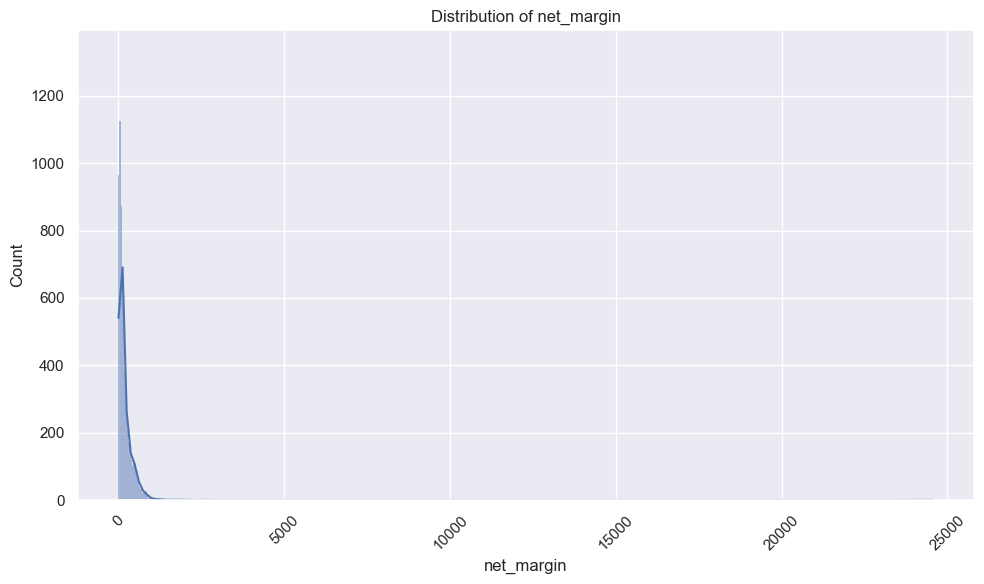

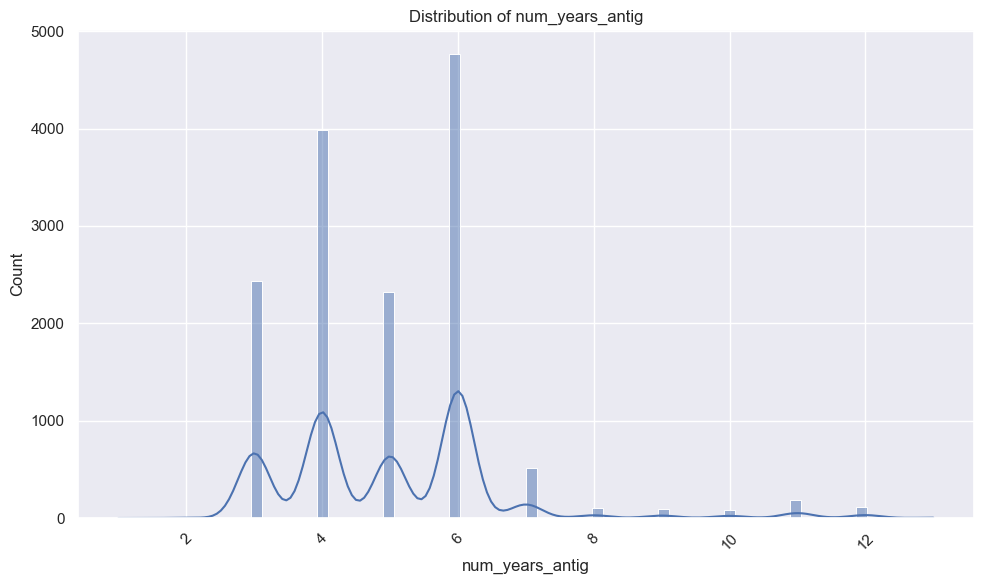

In [27]:
# Analyze key numeric columns
numeric_columns = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'net_margin',
    'num_years_antig'
]

for col in numeric_columns:
    plot_distribution(client_data, col, col)

In [28]:
# Churn Analysis
print("\n=== Churn Rate ===")
churn_rate = client_data['churn'].mean() * 100
print(f"Overall churn rate: {churn_rate:.2f}%")


=== Churn Rate ===
Overall churn rate: 9.72%


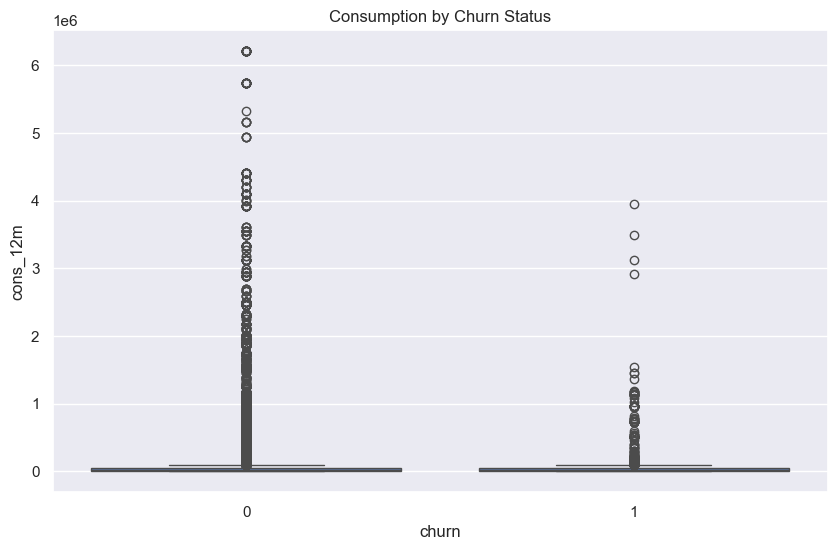

In [29]:
# Relationship between consumption and churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='cons_12m', data=client_data)
plt.title('Consumption by Churn Status')
plt.show()

In [30]:
# Price analysis over time
# Get average prices per month
price_data['year_month'] = price_data['price_date'].dt.to_period('M')
monthly_prices = price_data.groupby('year_month').agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean'
}).reset_index()

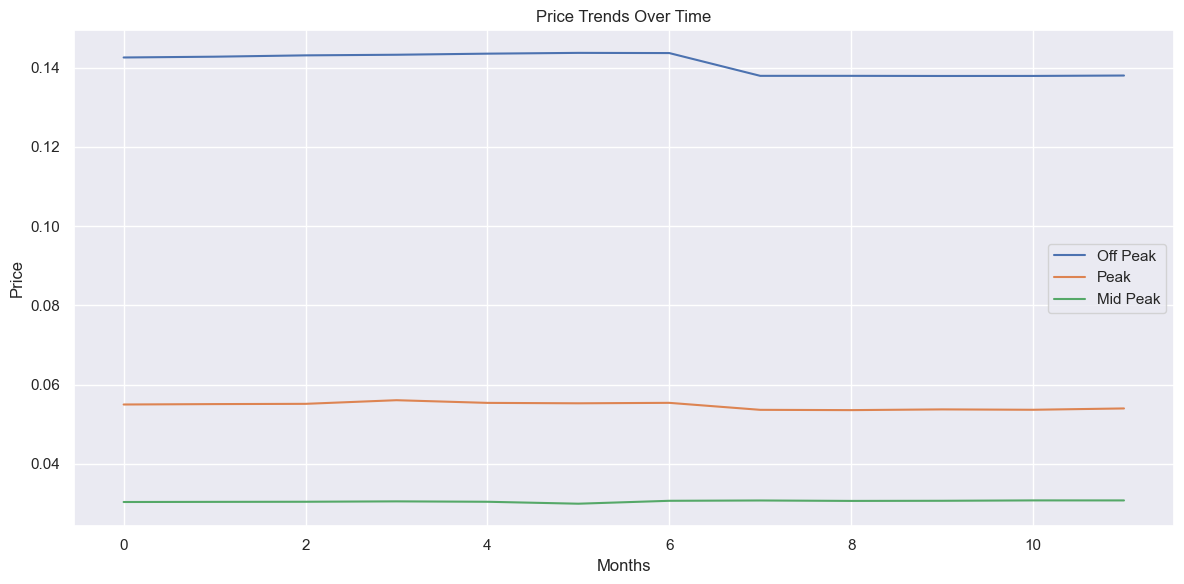

In [31]:
# Plot price trends
plt.figure(figsize=(12, 6))
plt.plot(range(len(monthly_prices)), monthly_prices['price_off_peak_var'], label='Off Peak')
plt.plot(range(len(monthly_prices)), monthly_prices['price_peak_var'], label='Peak')
plt.plot(range(len(monthly_prices)), monthly_prices['price_mid_peak_var'], label='Mid Peak')
plt.title('Price Trends Over Time')
plt.xlabel('Months')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
# Customer Segmentation by Consumption
client_data['consumption_segment'] = pd.qcut(client_data['cons_12m'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

C:\Users\vohi0\AppData\Local\Temp\ipykernel_31328\647435122.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_segment = client_data.groupby('consumption_segment')['churn'].mean() * 100


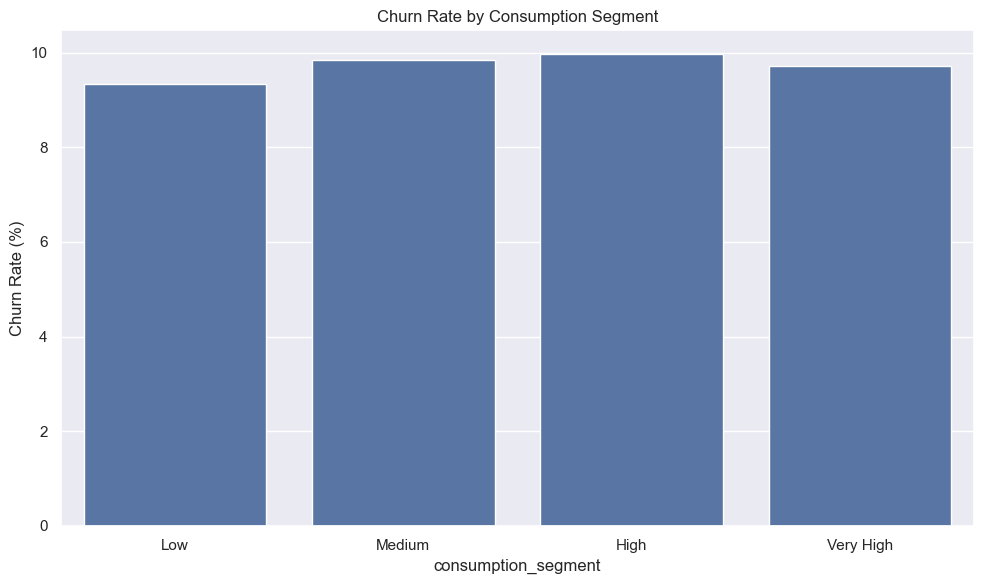

In [33]:
# Analyze churn by consumption segment
plt.figure(figsize=(10, 6))
churn_by_segment = client_data.groupby('consumption_segment')['churn'].mean() * 100
sns.barplot(x=churn_by_segment.index, y=churn_by_segment.values)
plt.title('Churn Rate by Consumption Segment')
plt.ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()

In [36]:
import numpy as np
# Correlation Analysis
# Select numeric columns for correlation
numeric_cols = client_data.select_dtypes(include=[np.number]).columns
correlation_matrix = client_data[numeric_cols].corr()

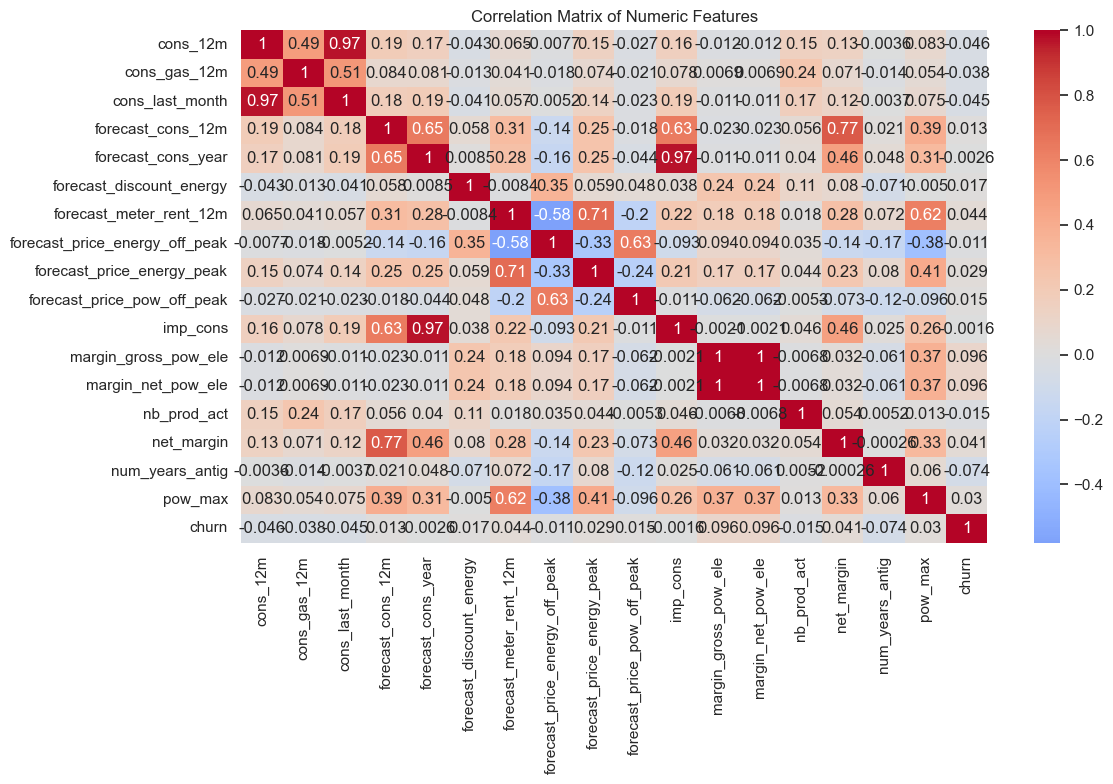

In [37]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

In [38]:
# Summary Statistics by Churn Status
print("\n=== Summary Statistics by Churn Status ===")
print(client_data.groupby('churn')[numeric_columns].mean())


=== Summary Statistics by Churn Status ===
            cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
churn                                                                    
0      167867.266550  30121.497308     17046.352089        1858.473333   
1       78862.478506   9235.411557      7205.239605        1962.861938   

       net_margin  num_years_antig  
churn                               
0      185.057407         5.037006  
1      228.361938         4.633545  


In [39]:
# Additional Insights
# Calculate customer lifetime
client_data['customer_lifetime'] = (pd.to_datetime(client_data['date_end']) - 
                                  pd.to_datetime(client_data['date_activ'])).dt.days

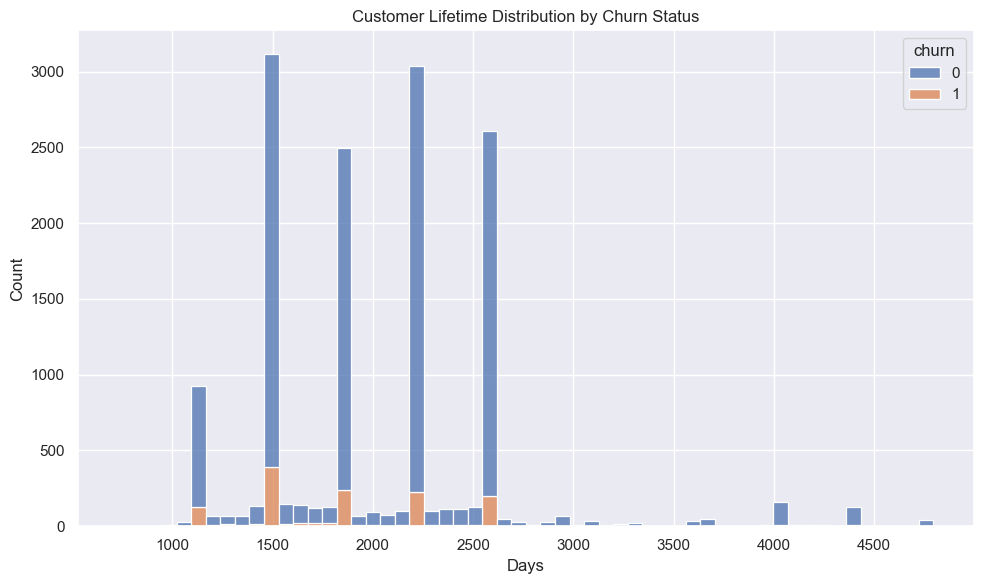

In [40]:
# Plot customer lifetime distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=client_data, x='customer_lifetime', hue='churn', multiple="stack")
plt.title('Customer Lifetime Distribution by Churn Status')
plt.xlabel('Days')
plt.tight_layout()
plt.show()

In [41]:
# Save key findings to a text file
with open('analysis_findings.txt', 'w') as f:
    f.write("PowerCo Customer Churn Analysis - Key Findings\n")
    f.write("=" * 50 + "\n\n")
    f.write(f"1. Overall churn rate: {churn_rate:.2f}%\n")
    f.write("\n2. Missing Data Summary:\n")
    f.write(client_data.isnull().sum().to_string())
    f.write("\n\n3. Correlation with Churn:\n")
    f.write(correlation_matrix['churn'].sort_values(ascending=False).to_string())
    f.write("\n\n4. Customer Segments Churn Rate:\n")
    f.write(churn_by_segment.to_string())